In [108]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np
import time

plt.rcParams.update({
    "text.usetex": True,  # Use LaTeX for text rendering
    "font.family": "serif",  # Set the font family to serif
    "font.serif": ["Times New Roman"],  # Specify the serif font
    "font.size": 22,  # Set the default font size
})

In [109]:
def van_der_pol(t,y,mu=1):
    return [y[1], mu*(1 - y[0]**2)*y[1] - y[0]]

def arenstorf(t, y, mu=0.012277471):
    mup = 1-mu 
    D1 = ((y[0]+mu)**2 + y[1]**2)**(3/2)
    D2 = ((y[0]-mup)**2 + y[1]**2)**(3/2)
    return np.array([
        y[2],
        y[3],
        y[0] + 2*y[3] - mup*(y[0]+mu)/D1 - mu*(y[0]-mup)/D2,
        y[1] - 2*y[2] - mup*y[1]/D1 - mu*y[1]/D2
    ])

10.0,1e-06,RK45: 0.27926015853881836
10.0,1e-06,LSODA: 0.1251213550567627
10.0,1e-09,RK45: 0.9045188426971436
10.0,1e-09,LSODA: 0.2967207431793213
10.0,1e-12,RK45: 3.4325082302093506
10.0,1e-12,LSODA: 0.48727869987487793


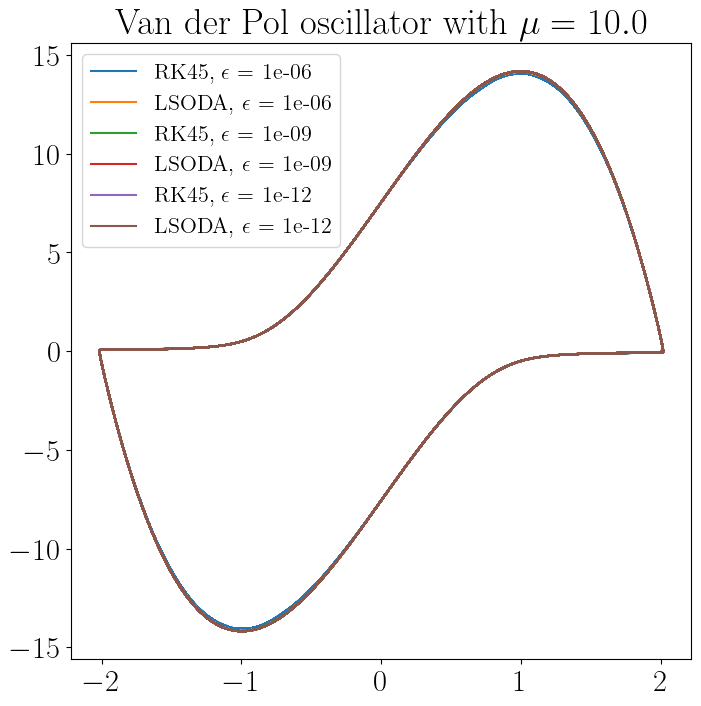

100.0,1e-06,RK45: 1.3068106174468994
100.0,1e-06,LSODA: 0.021835803985595703
100.0,1e-09,RK45: 1.420480489730835
100.0,1e-09,LSODA: 0.04826164245605469
100.0,1e-12,RK45: 2.846430778503418
100.0,1e-12,LSODA: 0.09174752235412598


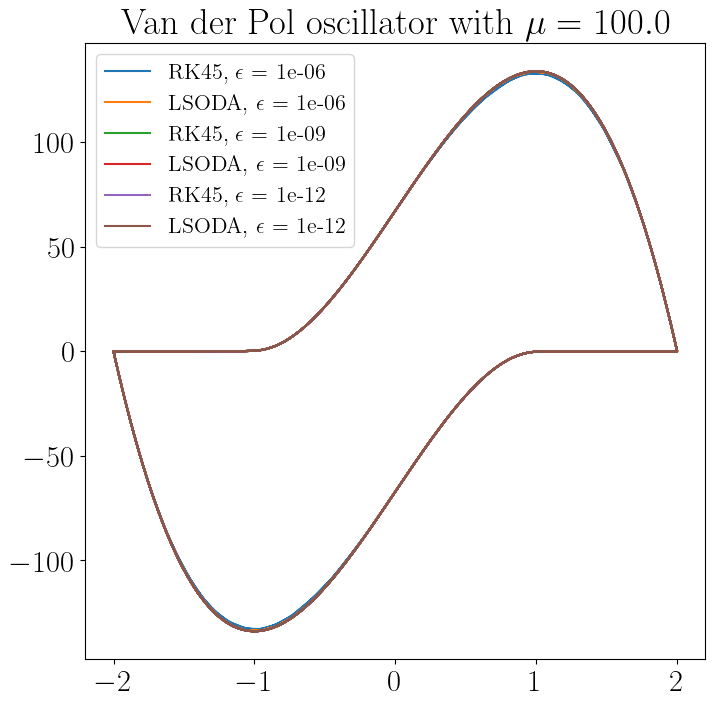

1000.0,1e-06,RK45: 14.18452787399292
1000.0,1e-06,LSODA: 0.0028045177459716797
1000.0,1e-09,RK45: 14.19219183921814
1000.0,1e-09,LSODA: 0.006043434143066406
1000.0,1e-12,RK45: 14.248943567276001
1000.0,1e-12,LSODA: 0.012762069702148438


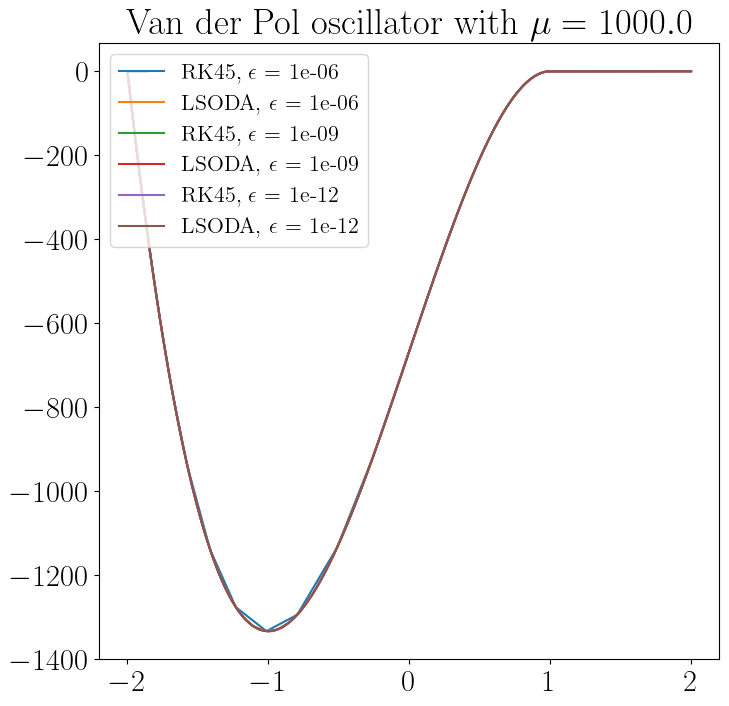

In [ ]:


tmax=1000.0
times = {}
for mu in [1e1,1e2,1e3]:
    fig,ax = plt.subplots(figsize=(8,8))
    plt.title(f'Van der Pol oscillator with $\mu = {mu}$')
    for eps in [1e-6,1e-9,1e-12]:
        for method in ['RK45','LSODA']:
            start_time = time.time()
            sol = solve_ivp(van_der_pol,[0,tmax],[2,0],args=(mu,),method=method,rtol=eps,atol=eps)
            end_time = time.time()
            times[mu,eps,method] = end_time-start_time
            print(f'{mu},{eps},{method}: {end_time-start_time}')
            ax.plot(sol.y[0], sol.y[1], label=f'{method}, $\epsilon$ = {eps}')
            ax.set_xlabel('$y_1$')
            ax.set_ylabel('$y_2$')
            # plt.plot(sol.t, sol.y[0])
            # print(np.min(sol.y))
    plt.legend(loc='upper left',fontsize=16)
    plt.show()

# plt.xlim([-3,3])

Text(0.5, 1.0, 'Aggregate log($\\epsilon$) vs. log(CPUtime)')

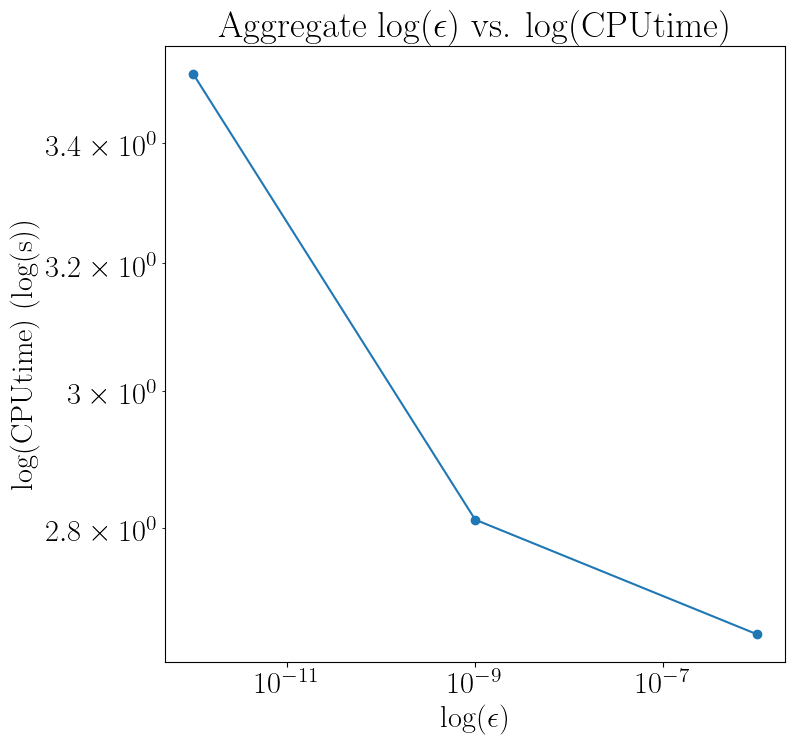

In [141]:
out = {eps:[] for eps in [1e-6,1e-9,1e-12]}
for (mu,eps,method), vals in times.items():
    # print(params)
    # print(vals)
    out[eps].append(vals)
for eps in out.keys():
    out[eps] = np.mean(out[eps])

fig,ax = plt.subplots(figsize=(8,8))
ax.plot(out.keys(),out.values(),'o-')
ax.set_xlabel('log($\\epsilon$)')
ax.set_ylabel('log(CPUtime) (log(s))')
ax.set_yscale('log')
ax.set_xscale('log')
plt.title('Aggregate log($\\epsilon$) vs. log(CPUtime)')

Text(0.5, 1.0, 'Solver dependence log($\\epsilon$) vs. log(CPUtime)')

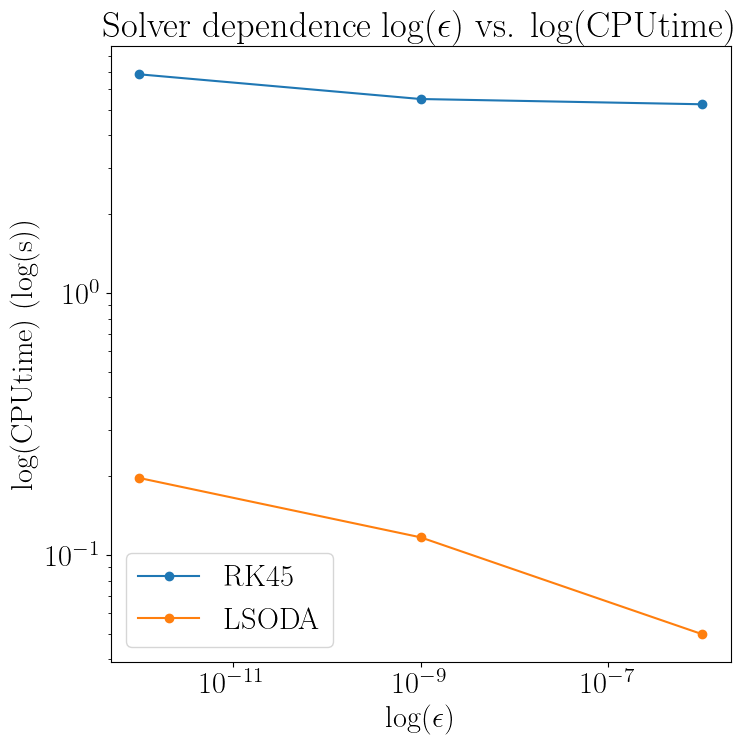

In [142]:
out = {eps:{method : [] for method in ['RK45','LSODA']} for eps in [1e-6,1e-9,1e-12]}
for (mu,eps,method), vals in times.items():
    # print(params)
    # print(vals)
    out[eps][method].append(vals)
for eps in out.keys():
    for method in out[eps].keys():
        out[eps][method] = np.mean(out[eps][method])

fig,ax = plt.subplots(figsize=(8,8))
for method in ['RK45','LSODA']:
    x = []
    y = []
    for eps in out.keys():
        x.append(eps)
        y.append(out[eps][method])
    ax.plot(x,y,'o-',label=method)
# x = []
# y = []
# for eps in out.keys():
#     x.append(eps)
#     y.append(out[eps]['LSODA'])
# ax.plot(x,y,'o-',label='LSODA')
ax.set_xlabel('log($\\epsilon$)')
ax.set_ylabel('log(CPUtime) (log(s))')
ax.set_yscale('log')
ax.set_xscale('log')
plt.legend()
plt.title('Solver dependence log($\\epsilon$) vs. log(CPUtime)')

{1e-06: {10.0: np.float64(0.20219075679779053),
  100.0: np.float64(0.6643232107162476),
  1000.0: np.float64(7.093666195869446)},
 1e-09: {10.0: np.float64(0.6006197929382324),
  100.0: np.float64(0.7343710660934448),
  1000.0: np.float64(7.099117636680603)},
 1e-12: {10.0: np.float64(1.9598934650421143),
  100.0: np.float64(1.469089150428772),
  1000.0: np.float64(7.130852818489075)}}

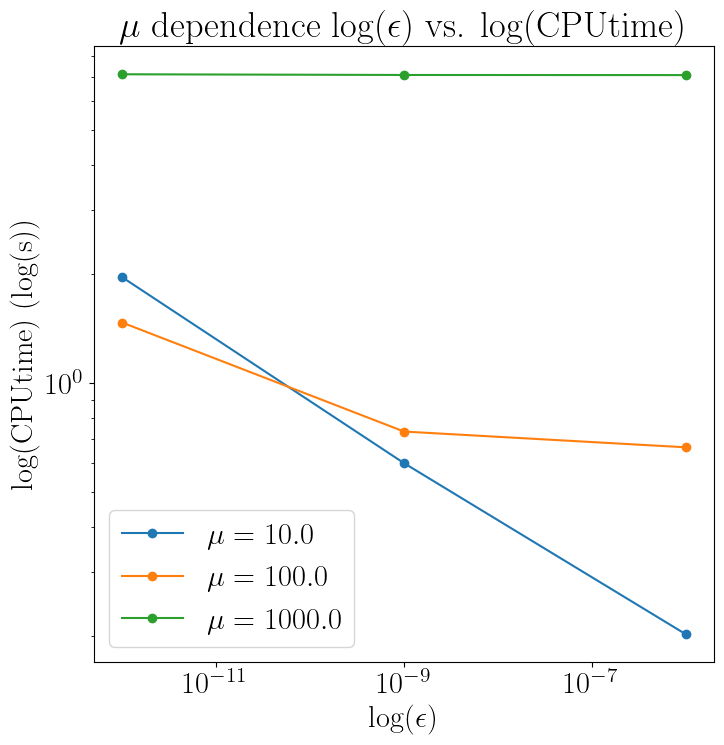

In [143]:
out = {eps:{mu : [] for mu in [1e1,1e2,1e3]} for eps in [1e-6,1e-9,1e-12]}
for (mu,eps,method), vals in times.items():
    # print(params)
    # print(vals)
    out[eps][mu].append(vals)
for eps in out.keys():
    for mu in out[eps].keys():
        out[eps][mu] = np.mean(out[eps][mu])

fig,ax = plt.subplots(figsize=(8,8))

for mu in [1e1,1e2,1e3]:
    x = []
    y = []
    for eps in out.keys():
        x.append(eps)
        y.append(out[eps][mu])
    ax.plot(x,y,'o-',label=f'$\\mu={mu}$')

ax.set_xlabel('log($\\epsilon$)')
ax.set_ylabel('log(CPUtime) (log(s))')
ax.set_yscale('log')
ax.set_xscale('log')
plt.legend()
plt.title('$\\mu$ dependence log($\\epsilon$) vs. log(CPUtime)')

out

17.065216560157964


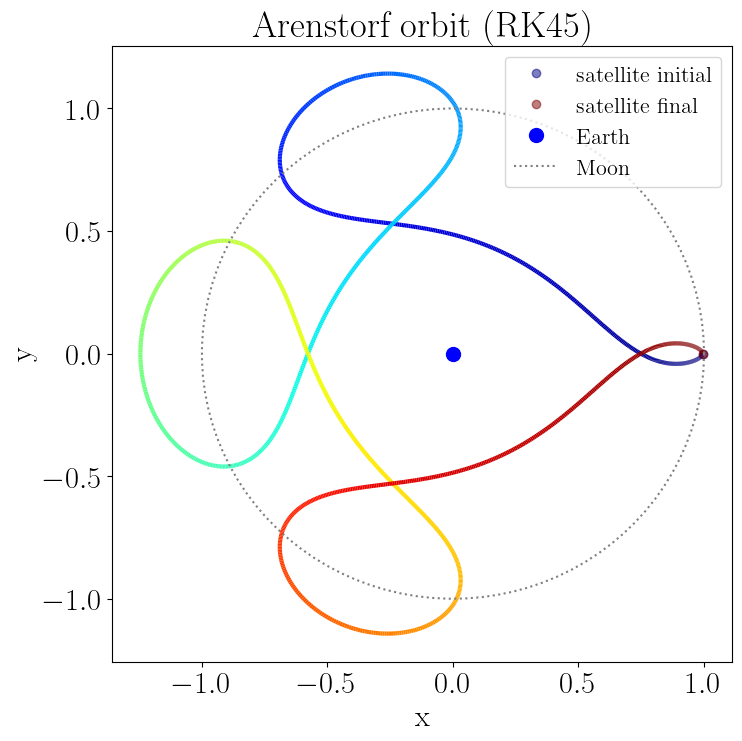

In [144]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.collections as mcoll
import matplotlib.path as mpath

def make_segments(x, y):
    """Create list of line segments from x and y coordinates, in the correct format
    for LineCollection: an array of the form numlines x (points per line) x 2 (x
    and y) array.
    """
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    return segments

def colorline(
    x, y, z=None, cmap=plt.get_cmap('copper'), norm=plt.Normalize(0.0, 1.0),
        linewidth=3, alpha=1.0):
    """
    http://nbviewer.ipython.org/github/dpsanders/matplotlib-examples/blob/master/colorline.ipynb
    http://matplotlib.org/examples/pylab_examples/multicolored_line.html
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    """

    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(x))

    # Special case if a single number:
    if not hasattr(z, "__iter__"):  # to check for numerical input -- this is a hack
        z = np.array([z])

    z = np.asarray(z)

    segments = make_segments(x, y)
    lc = mcoll.LineCollection(segments, array=z, cmap=cmap, norm=norm,
                              linewidth=linewidth, alpha=alpha)

    ax = plt.gca()
    ax.add_collection(lc)

    return lc

def plot_orbit(sol,title=''):
    fig, ax = plt.subplots(figsize=(8,8))
    plt.title(title)
    norm = plt.Normalize(sol.t.min(), sol.t.max())
    cmap = plt.get_cmap('jet')
    print(sol.t.max())
    # ax.plot(sol.y[0],sol.y[1],color = cmap(norm(sol.t)),label='satellite')
    ax.plot(sol.y[0][0],sol.y[1][0], 'o',color=cmap(0),alpha=.5,label='satellite initial')
    colorline(sol.y[0],sol.y[1],z=sol.t,cmap=cmap,norm=norm,linewidth=3,alpha=1.0)
    ax.plot(sol.y[0][-1],sol.y[1][-1], 'o',color=cmap(sol.t[-1]),alpha=.5,label='satellite final')
    ax.plot(0, 0, 'o', color='blue', markersize=10, label='Earth')

    theta = np.linspace(0, 2 * np.pi, 100)
    ax.plot(np.cos(theta), np.sin(theta), linestyle=':', color='gray',label='Moon')

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    plt.legend(loc='upper right',fontsize=16)

y0 = [.994,0,0,-2.001585106]

tmax = 17.0652165601579625588917206249
# tmax = 100
eps = 1e-12
mu=0.012277471
sol = solve_ivp(arenstorf,t_span=[0,tmax],y0=y0,method='RK45',rtol=eps,atol=eps)

plot_orbit(sol,title='Arenstorf orbit (RK45)')

RK45 took 0.8311877250671387 seconds
100.0


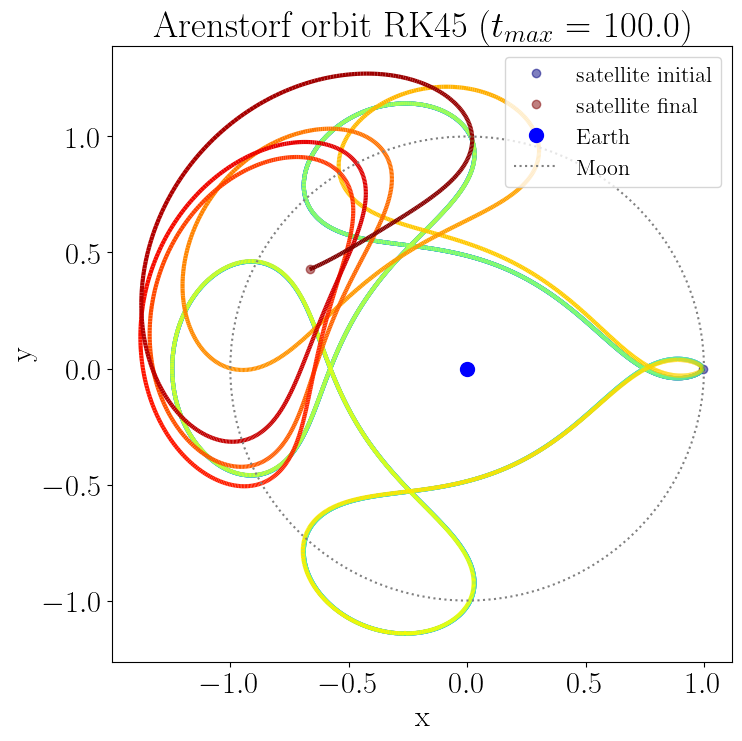

DOP853 took 0.2821085453033447 seconds
100.0


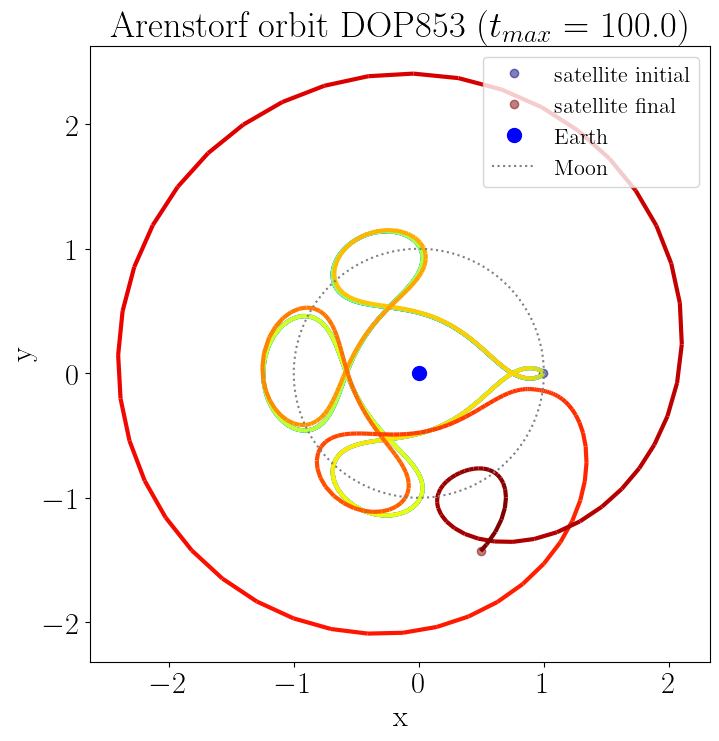

Radau took 9.515780687332153 seconds
100.0


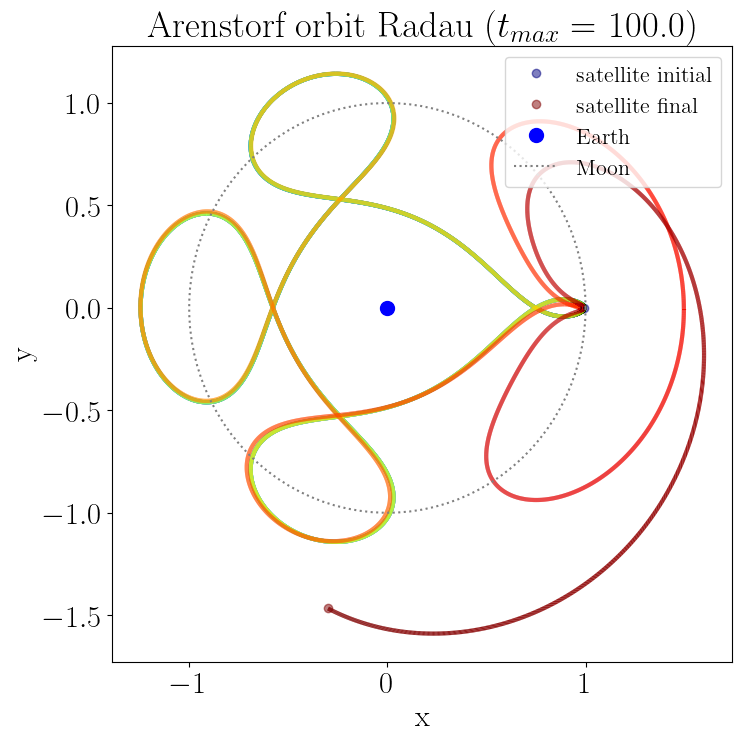

In [145]:

# y0 = np.array([.994,0,0,-2.001585106])
y0 = np.array([.994,0,0,-2.00158510637908252240537862224])

tmax = 100.0
eps = 1.0e-12
mu= 0.012277471
times = {}
for method in ['RK45','DOP853','Radau']:
    start_time = time.time()
    sol = solve_ivp(arenstorf,t_span=[0,tmax],y0=y0,method=method,args=(mu,),rtol=eps,atol=eps,vectorized=True)
    end_time = time.time()
    print(f'{method} took {end_time-start_time} seconds')
    times[method] = end_time-start_time
    # fig, ax = plt.subplots(figsize=(8,8))
    # plt.title(f'{method} solution')
    # ax.plot(sol.y[0],sol.y[1])
    # ax.set_xlabel('x')
    # ax.set_ylabel('y')
    # plt.show()
    plot_orbit(sol,title=f'Arenstorf orbit {method} ($t_{{max}}$ = {tmax})')
    plt.show()

In [25]:
def R2RAS(R = lambda z : 1 + z + 0.5*z*z,cmap='Blues',label='R'):
    nx = 100
    ny = 160
    x = np.linspace(-4,1,nx)
    y = np.linspace(-4,4,ny)
    xg,yg = np.meshgrid(x,y)

    z = xg + 1j*yg 
    f = R(z)
    absf = (f.real)**2 + (f.imag)**2

    plt.rcParams.update({'font.size': 22})
    
    con = plt.contourf(xg,yg,absf,np.arange(2), cmap=cmap, alpha=0.1)
    plt.contour(xg,yg,absf,np.arange(2), cmap=cmap)  
    plt.plot([], [], color=cmap[:-1], label=label)
    plt.title("RAS")
    plt.xlabel("Re(z)")
    plt.ylabel("Im(z)")
    # plt.colorbar(con, label=label, orientation='vertical')
    ax.set_aspect(1)
    plt.grid(color='k', linestyle='--', linewidth=0.5)
    # plt.show()

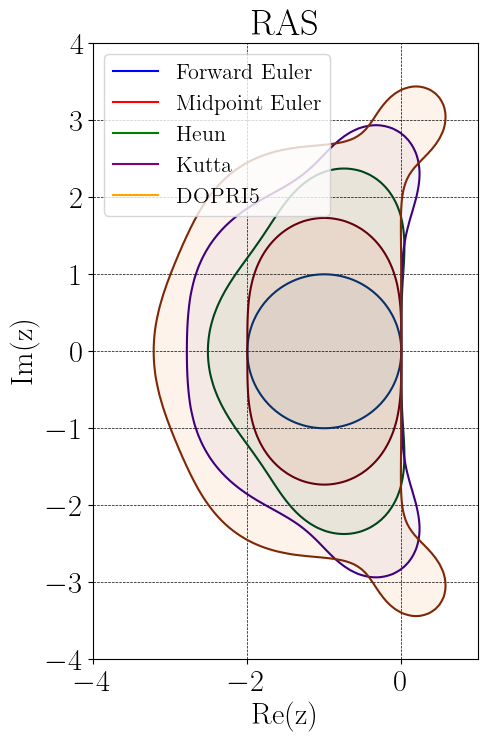

In [146]:
fig, ax = plt.subplots(figsize=(8,8))

R_euler = lambda z : 1 + z 

R2RAS(R_euler,cmap='Blues',label='Forward Euler')

R_mdpt_euler = lambda z : 1 + z + 0.5*z**2

R2RAS(R_mdpt_euler,cmap='Reds',label='Midpoint Euler')

R_heun = lambda z : 1 + z + 0.5*z**2 + (z**3)/6

R2RAS(R_heun,cmap='Greens',label='Heun')

R_kutta = lambda z : 1 + z + 0.5*z**2 + (z**3)/6 + (z**4)/24 

R2RAS(R_kutta,cmap='Purples',label='Kutta')

R_DOPRI5 = lambda z : 1 + z + 0.5*z**2 + (z**3)/6 + (z**4)/24 + (z**5)/120

R2RAS(R_DOPRI5,cmap='Oranges',label='DOPRI5')

plt.legend(loc='upper left',fontsize=16)
plt.show()